In [1]:
import sys
sys.path.append("..")

#import jax
#jax.config.update("jax_enable_x64", True)

from utils import *
from model_tn import *
from keras_utils import *
from jax_utils import *

keras.mixed_precision.set_global_policy("mixed_float16")

In [2]:
class PhysNet16(keras.Model):

    def __init__(self, TN=False):
        super().__init__()
        self.TN = TN
        self.ConvBlock3 = keras.Sequential([
            layers.Conv3D(64, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.ConvBlock5 = keras.Sequential([
            layers.Conv3D(64, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.ConvBlock7 = keras.Sequential([
            layers.Conv3D(64, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.ConvBlock9 = keras.Sequential([
            layers.Conv3D(16, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.upsample = keras.Sequential([
            layers.Conv3DTranspose(16, kernel_size=(4, 1, 1), strides=(2, 1, 1), padding='same'),
            layers.BatchNormalization(),
            layers.Activation('elu')
        ])
        self.upsample2 = keras.Sequential([
            layers.Conv3DTranspose(8, kernel_size=(4, 1, 1), strides=(2, 1, 1), padding='same'),
            layers.BatchNormalization(),
            layers.Activation('elu')
        ])
        self.convBlock10 = layers.Conv3D(1, kernel_size=(1, 1, 1), strides=1)
        self.MaxpoolSpa = layers.MaxPool3D((1, 2, 2), strides=(1, 2, 2))
        self.MaxpoolSpaTem = layers.MaxPool3D((2, 2, 2), strides=2)
        self.poolspa = layers.AvgPool3D((1, 2, 2))
        self.flatten = layers.Reshape((-1,))

    def call(self, x, training=None):
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock1(x, training=training)
        #x = self.MaxpoolSpa(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock2(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock3(x, training=training)
        x = self.MaxpoolSpaTem(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock4(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock5(x, training=training)
        x = self.MaxpoolSpaTem(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock6(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock7(x, training=training)
        x = self.MaxpoolSpa(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock8(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock9(x, training=training)
        x = self.upsample(x, training=training)
        x = self.upsample2(x, training=training)
        x = self.poolspa(x)
        x = self.convBlock10(x, training=training)
        x = self.flatten(x)
        x = (x-ops.mean(x, axis=1, keepdims=True))/ops.std(x, axis=1, keepdims=True)
        return x

class PhysNet8(keras.Model):

    def __init__(self, TN=False):
        super().__init__()
        self.TN = TN
        self.ConvBlock3 = keras.Sequential([
            layers.Conv3D(32, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.ConvBlock5 = keras.Sequential([
            layers.Conv3D(32, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.ConvBlock9 = keras.Sequential([
            layers.Conv3D(32, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.upsample = keras.Sequential([
            layers.Conv3DTranspose(8, kernel_size=(4, 1, 1), strides=(2, 1, 1), padding='same'),
            layers.BatchNormalization(),
            layers.Activation('elu')
        ])
        self.convBlock10 = layers.Conv3D(1, kernel_size=(1, 1, 1), strides=1)
        self.MaxpoolSpa = layers.MaxPool3D((1, 2, 2), strides=(1, 2, 2))
        self.MaxpoolSpaTem = layers.MaxPool3D((2, 2, 2), strides=2)
        self.poolspa = layers.AvgPool3D((1, 2, 2))
        self.flatten = layers.Reshape((-1,))

    def call(self, x, training=None):
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock1(x, training=training)
        #x = self.MaxpoolSpa(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock2(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock3(x, training=training)
        #x = self.MaxpoolSpaTem(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock4(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock5(x, training=training)
        x = self.MaxpoolSpaTem(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock6(x, training=training)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock7(x, training=training)
        x = self.MaxpoolSpa(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock8(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock9(x, training=training)
        x = self.upsample(x, training=training)
        #x = self.upsample2(x, training=training)
        x = self.poolspa(x)
        x = self.convBlock10(x, training=training)
        x = self.flatten(x)
        x = (x-ops.mean(x, axis=1, keepdims=True))/ops.std(x, axis=1, keepdims=True)
        return x

class PhysNet4(keras.Model):

    def __init__(self, TN=False):
        super().__init__()
        self.TN = TN
        self.ConvBlock3 = keras.Sequential([
            layers.Conv3D(16, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.ConvBlock5 = keras.Sequential([
            layers.Conv3D(16, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.ConvBlock9 = keras.Sequential([
            layers.Conv3D(4, kernel_size=(3, 3, 3), strides=1, padding='same'),
            layers.BatchNormalization(),
            layers.Activation('relu')
        ])
        self.convBlock10 = layers.Conv3D(1, kernel_size=(1, 1, 1), strides=1)
        self.MaxpoolSpa = layers.MaxPool3D((1, 2, 2), strides=(1, 2, 2))
        self.poolspa = layers.AvgPool3D((1, 2, 2))
        self.flatten = layers.Reshape((-1,))

    def call(self, x, training=None):
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock3(x, training=training)
        x = self.MaxpoolSpa(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock2(x, training=training)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock4(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock5(x, training=training)
        #x = self.MaxpoolSpaTem(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock6(x, training=training)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock7(x, training=training)
        #x = self.MaxpoolSpa(x)
        #x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        #x = self.ConvBlock8(x, training=training)
        x = TNM(self.TN, axis=1, frames=x.shape[1])(x)
        x = self.ConvBlock9(x, training=training)
        #x = self.upsample(x, training=training)
        #x = self.upsample2(x, training=training)
        x = self.poolspa(x)
        x = self.convBlock10(x, training=training)
        x = self.flatten(x)
        x = (x-ops.mean(x, axis=1, keepdims=True))/ops.std(x, axis=1, keepdims=True)
        return x

In [3]:
model = PhysNet16()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss=np_loss)
a = model(np.random.random((1, 64, 16, 16, 3)));
model.summary()

Model: "phys_net16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (1, 64, 16, 16, 64)    │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (1, 32, 8, 8, 64)      │       110,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (1, 16, 4, 4, 64)      │       110,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (1, 16, 2, 2, 16)      │        27,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (1, 32, 2, 2, 16)      │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (1, 64, 2, 2, 8)       │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_4 (Conv3D)               │ (1, 64, 1, 1, 1)       │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (1, 16, 2, 2, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (1, 32, 8, 8, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling3d               │ (1, 64, 1, 1, 8)       │             0 │
│ (AveragePooling3D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (1, 64)                │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,721 (1002.82 KB)

 Trainable params: 256,257 (1001.00 KB)

 Non-trainable params: 464 (1.81 KB)

In [4]:
batch_size = 128

rlap_tape = "/root/ssd_cache/rppg_training_data/rlap_64x16x16_all"

train_rlap = load_datatape(rlap_tape, fold='train', batch=batch_size)
valid_rlap = load_datatape(rlap_tape, fold='val', extended_hr='False', batch=batch_size)

#train_rlap = DatatapeMonitor(train_rlap)
training_set, validation_set = KerasDataset(train_rlap), KerasDataset(valid_rlap)

training_set = training_set.apply_fn(compress_aug)

rlap_64x16x16_all              datatape has been loaded.    50176 items total. fold=train selected
rlap_64x16x16_all              datatape has been loaded.     6144 items total. fold=val&extended_hr=False selected


In [5]:
train(model, training_set, validation_set, epochs=20, check_point_path='../weights/physnet16.weights.h5')
model.load_weights('../weights/physnet16.weights.h5')

Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   1:  Training loss:0.9954	Validation loss: 0.999	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   2:  Training loss:0.8221	Validation loss: 0.691	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   3:  Training loss:0.4223	Validation loss: 0.367	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   4:  Training loss:0.3615	Validation loss:0.3446	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   5:  Training loss:0.3359	Validation loss:0.3194	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   6:  Training loss: 0.318	Validation loss:0.3105	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   7:  Training loss:0.3096	Validation loss:0.3191	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   8:  Training loss:0.3021	Validation loss:0.2966	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   9:  Training loss:0.2944	Validation loss:0.2916	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  10:  Training loss:0.2871	Validation loss:0.2891	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  11:  Training loss:0.2788	Validation loss:0.2716	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  12:  Training loss:0.2741	Validation loss:0.2665	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  13:  Training loss:0.2705	Validation loss:0.2645	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  14:  Training loss:0.2669	Validation loss:0.2603	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  15:  Training loss:0.2636	Validation loss:0.2649	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  16:  Training loss:0.2595	Validation loss:0.2577	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  17:  Training loss:0.2568	Validation loss:0.2602	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  18:  Training loss:0.2553	Validation loss:0.2548	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  19:  Training loss:0.2536	Validation loss:0.2512	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  20:  Training loss:0.2522	Validation loss:0.2511	


In [6]:
eval_on_dataset(dataset_H5_mmpd, pmodel(model), 64, (16, 16), step=2, batch=16, save='../results/PhysNet16_RLAP_MMPD.h5')
get_metrics('../results/PhysNet16_RLAP_MMPD.h5', dropped='False')

  0%|          | 0/660 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,16.2±0.197,23.285±3.326,18.617±0.212,0.24289
Whole,12.472±0.487,17.644±4.886,14.065±0.484,0.39334


In [7]:
eval_on_dataset(dataset_H5_cohface, pmodel(model), 64, (16, 16), step=2, batch=16, save='../results/PhysNet16_RLAP_COHFACE.h5', fps=30)
get_metrics('../results/PhysNet16_RLAP_COHFACE.h5')

  0%|          | 0/164 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,13.49±0.328,19.468±3.972,19.223±0.496,0.15855
Whole,9.848±0.627,12.709±4.105,14.201±0.921,0.27392


In [8]:
eval_on_dataset(dataset_H5_pure, pmodel(model), 64, (16, 16), step=2, batch=16, save='../results/PhysNet16_RLAP_PURE.h5')
get_metrics('../results/PhysNet16_RLAP_PURE.h5')

  0%|          | 0/59 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,17.128±0.686,25.539±7.21,21.842±0.583,-0.01551
Whole,16.805±2.391,24.893±13.582,21.26±1.733,-0.02551


In [9]:
eval_on_dataset(dataset_H5_ubfc_rppg2, pmodel(model), 64, (16, 16), step=2, batch=16, save='../results/PhysNet16_RLAP_UBFC.h5')
get_metrics('../results/PhysNet16_RLAP_UBFC.h5')

  0%|          | 0/42 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,1.373±0.105,2.766±1.346,1.414±0.112,0.98668
Whole,0.644±0.138,1.099±0.707,0.652±0.142,0.99792


In [10]:
model = PhysNet16(TN=True)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss=np_loss)
a = model(np.random.random((1, 64, 16, 16, 3)));
model.summary()

Model: "phys_net16_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (1, 64, 16, 16, 64)    │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (1, 32, 8, 8, 64)      │       110,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_8 (Sequential)       │ (1, 16, 4, 4, 64)      │       110,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_9 (Sequential)       │ (1, 16, 2, 2, 16)      │        27,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (1, 32, 2, 2, 16)      │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_11 (Sequential)      │ (1, 64, 2, 2, 8)       │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_9 (Conv3D)               │ (1, 64, 1, 1, 1)       │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (1, 16, 2, 2, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (1, 32, 8, 8, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling3d_1             │ (1, 64, 1, 1, 8)       │             0 │
│ (AveragePooling3D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (1, 64)                │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,721 (1002.82 KB)

 Trainable params: 256,257 (1001.00 KB)

 Non-trainable params: 464 (1.81 KB)

In [11]:
train(model, training_set, validation_set, epochs=20, check_point_path='../weights/physnet16tn.weights.h5')
model.load_weights('../weights/physnet16tn.weights.h5')

Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   1:  Training loss:0.4122	Validation loss:0.2593	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   2:  Training loss:0.2582	Validation loss:0.2255	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   3:  Training loss: 0.234	Validation loss:0.2114	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   4:  Training loss:0.2199	Validation loss:0.2022	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   5:  Training loss:0.2095	Validation loss:0.1945	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   6:  Training loss:0.2022	Validation loss:0.1917	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   7:  Training loss:0.1981	Validation loss:0.1892	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   8:  Training loss:0.1948	Validation loss:0.1876	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch   9:  Training loss:0.1915	Validation loss:0.1853	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  10:  Training loss:0.1884	Validation loss:0.1839	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  11:  Training loss:0.1854	Validation loss:0.1833	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  12:  Training loss:0.1837	Validation loss:0.1824	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  13:  Training loss:0.1824	Validation loss:0.1811	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  14:  Training loss: 0.181	Validation loss:0.1807	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  15:  Training loss:0.1796	Validation loss:0.1801	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  16:  Training loss:0.1782	Validation loss:0.1797	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  17:  Training loss:0.1773	Validation loss:0.1796	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  18:  Training loss:0.1766	Validation loss:0.1795	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  19:  Training loss:0.1759	Validation loss:0.1791	


Training:   0%|          | 0/392 [00:00<?, ?it/s]

Validating:   0%|          | 0/48 [00:00<?, ?it/s]

Epoch  20:  Training loss:0.1752	Validation loss:0.1787	


In [12]:
eval_on_dataset(dataset_H5_mmpd, pmodel(model), 64, (16, 16), step=2, batch=16, save='../results/PhysNet16TN_RLAP_MMPD.h5')
get_metrics('../results/PhysNet16TN_RLAP_MMPD.h5', dropped='False')

  0%|          | 0/660 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,11.125±0.181,18.991±3.114,12.685±0.199,0.39774
Whole,7.943±0.388,12.727±3.934,8.805±0.382,0.64348


In [13]:
eval_on_dataset(dataset_H5_cohface, pmodel(model), 64, (16, 16), step=2, batch=16, save='../results/PhysNet16TN_RLAP_COHFACE.h5', fps=30)
get_metrics('../results/PhysNet16TN_RLAP_COHFACE.h5')

  0%|          | 0/164 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,3.419±0.187,8.676±2.699,4.596±0.236,0.73428
Whole,2.438±0.404,5.715±3.185,3.19±0.477,0.87319


In [14]:
eval_on_dataset(dataset_H5_pure, pmodel(model), 64, (16, 16), step=2, batch=16, save='../results/PhysNet16TN_RLAP_PURE.h5')
get_metrics('../results/PhysNet16TN_RLAP_PURE.h5')

  0%|          | 0/59 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,0.522±0.064,1.841±1.012,0.798±0.107,0.99681
Whole,0.336±0.117,0.957±0.869,0.523±0.22,0.99919


In [15]:
eval_on_dataset(dataset_H5_ubfc_rppg2, pmodel(model), 64, (16, 16), step=2, batch=16, save='../results/PhysNet16TN_RLAP_UBFC.h5')
get_metrics('../results/PhysNet16TN_RLAP_UBFC.h5')

  0%|          | 0/42 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,1.219±0.09,2.382±1.094,1.249±0.095,0.99014
Whole,0.478±0.085,0.73±0.446,0.465±0.078,0.99917


In [16]:
model = PhysNet8()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss=np_loss)
a = model(np.random.random((4, 32, 8, 8, 3)));
model.summary()

Model: "phys_net8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (4, 32, 8, 8, 32)      │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ (4, 32, 8, 8, 32)      │        27,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_14 (Sequential)      │ (4, 16, 2, 2, 32)      │        27,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_15 (Sequential)      │ (4, 32, 2, 2, 8)       │         1,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_13 (Conv3D)              │ (4, 32, 1, 1, 1)       │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_4 (MaxPooling3D)  │ (4, 16, 2, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (4, 16, 4, 4, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling3d_2             │ (4, 32, 1, 1, 8)       │             0 │
│ (AveragePooling3D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (4, 32)                │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,441 (232.19 KB)

 Trainable params: 59,233 (231.38 KB)

 Non-trainable params: 208 (832.00 B)

In [17]:
batch_size = 128

rlap_tape = "/root/ssd_cache/rppg_training_data/rlap_32x8x8_all"

train_rlap = load_datatape(rlap_tape, fold='train', batch=batch_size)
valid_rlap = load_datatape(rlap_tape, fold='val', extended_hr='False', batch=batch_size)

#train_rlap = DatatapeMonitor(train_rlap)
training_set, validation_set = KerasDataset(train_rlap), KerasDataset(valid_rlap)

training_set = training_set.apply_fn(compress_aug)

rlap_32x8x8_all                datatape has been loaded.   100480 items total. fold=train selected
rlap_32x8x8_all                datatape has been loaded.    12416 items total. fold=val&extended_hr=False selected


In [18]:
train(model, training_set, validation_set, epochs=20, check_point_path='../weights/physnet8.weights.h5')
model.load_weights('../weights/physnet8.weights.h5')

Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   1:  Training loss:0.9829	Validation loss:0.9786	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   2:  Training loss:0.7251	Validation loss:0.6211	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   3:  Training loss:0.5115	Validation loss:0.4705	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   4:  Training loss:0.4591	Validation loss:0.4591	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   5:  Training loss:0.4382	Validation loss:0.4494	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   6:  Training loss:0.4196	Validation loss:0.3853	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   7:  Training loss:0.4039	Validation loss:0.3884	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   8:  Training loss:0.3969	Validation loss:0.4355	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   9:  Training loss:0.3881	Validation loss:0.3869	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  10:  Training loss:0.3778	Validation loss:0.4034	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  11:  Training loss:0.3754	Validation loss:0.4356	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  12:  Training loss:0.3709	Validation loss:0.3576	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  13:  Training loss:0.3672	Validation loss:0.3573	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  14:  Training loss:0.3594	Validation loss:0.3539	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  15:  Training loss:0.3575	Validation loss:  0.35	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  16:  Training loss:0.3526	Validation loss:0.3563	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  17:  Training loss:0.3509	Validation loss:0.3352	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  18:  Training loss:0.3473	Validation loss:0.3547	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  19:  Training loss:0.3425	Validation loss:0.3367	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  20:  Training loss:0.3428	Validation loss:0.3488	


In [19]:
eval_on_dataset(dataset_H5_mmpd, pmodel(model), 32, (8, 8), step=1, batch=16, save='../results/PhysNet8_RLAP_MMPD.h5')
get_metrics('../results/PhysNet8_RLAP_MMPD.h5', dropped='False')

  0%|          | 0/660 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,25.189±0.241,32.484±3.931,30.469±0.314,0.01713
Whole,17.786±0.584,23.237±5.626,21.465±0.749,0.0241


In [20]:
eval_on_dataset(dataset_H5_cohface, pmodel(model), 32, (8, 8), step=1, batch=16, save='../results/PhysNet8_RLAP_COHFACE.h5')
get_metrics('../results/PhysNet8_RLAP_COHFACE.h5')

  0%|          | 0/164 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,14.217±0.367,21.177±4.365,19.198±0.512,0.08892
Whole,10.722±0.768,14.553±5.276,14.335±0.928,0.17254


In [21]:
eval_on_dataset(dataset_H5_pure, pmodel(model), 32, (8, 8), step=1, batch=16, save='../results/PhysNet8_RLAP_PURE.h5')
get_metrics('../results/PhysNet8_RLAP_PURE.h5')

  0%|          | 0/59 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,40.672±0.938,48.21±8.471,67.995±1.9,0.03108
Whole,37.254±2.338,41.356±13.919,63.261±5.531,0.06691


In [22]:
eval_on_dataset(dataset_H5_ubfc_rppg2, pmodel(model), 32, (8, 8), step=1, batch=16, save='../results/PhysNet8_RLAP_UBFC.h5')
get_metrics('../results/PhysNet8_RLAP_UBFC.h5')

  0%|          | 0/42 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,1.281±0.087,2.357±1.077,1.318±0.09,0.99031
Whole,0.498±0.087,0.754±0.47,0.495±0.076,0.99906


In [23]:
model = PhysNet8(TN=True)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss=np_loss)
a = model(np.random.random((4, 32, 8, 8, 3)));
model.summary()

Model: "phys_net8_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_16 (Sequential)      │ (4, 32, 8, 8, 32)      │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (4, 32, 8, 8, 32)      │        27,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_18 (Sequential)      │ (4, 16, 2, 2, 32)      │        27,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_19 (Sequential)      │ (4, 32, 2, 2, 8)       │         1,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_17 (Conv3D)              │ (4, 32, 1, 1, 1)       │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (4, 16, 2, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (4, 16, 4, 4, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling3d_3             │ (4, 32, 1, 1, 8)       │             0 │
│ (AveragePooling3D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (4, 32)                │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,441 (232.19 KB)

 Trainable params: 59,233 (231.38 KB)

 Non-trainable params: 208 (832.00 B)

In [24]:
train(model, training_set, validation_set, epochs=20, check_point_path='../weights/physnet8tn.weights.h5')
model.load_weights('../weights/physnet8tn.weights.h5')

Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   1:  Training loss:0.4024	Validation loss:0.2704	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   2:  Training loss:0.3003	Validation loss:0.2342	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   3:  Training loss:0.2719	Validation loss:0.2219	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   4:  Training loss:0.2564	Validation loss:0.2132	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   5:  Training loss:0.2455	Validation loss:0.2059	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   6:  Training loss: 0.236	Validation loss:0.2009	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   7:  Training loss:0.2291	Validation loss:0.1992	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   8:  Training loss:0.2233	Validation loss:0.1991	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   9:  Training loss:0.2205	Validation loss:0.1968	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  10:  Training loss: 0.216	Validation loss:0.1924	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  11:  Training loss:0.2127	Validation loss:0.1945	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  12:  Training loss:0.2087	Validation loss:0.1931	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  13:  Training loss:0.2078	Validation loss:0.1934	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  14:  Training loss:0.2053	Validation loss:0.1931	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  15:  Training loss:0.2025	Validation loss:0.1922	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  16:  Training loss:0.2013	Validation loss:0.1932	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  17:  Training loss:0.1982	Validation loss:0.1937	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  18:  Training loss: 0.197	Validation loss:0.1942	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  19:  Training loss:0.1953	Validation loss:0.1954	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  20:  Training loss:0.1946	Validation loss:0.1934	


In [25]:
eval_on_dataset(dataset_H5_mmpd, pmodel(model), 32, (8, 8), step=1, batch=16, save='../results/PhysNet8TN_RLAP_MMPD.h5')
get_metrics('../results/PhysNet8TN_RLAP_MMPD.h5', dropped='False')

  0%|          | 0/660 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,11.888±0.185,19.738±3.163,14.065±0.226,0.37269
Whole,7.577±0.348,11.694±3.461,8.919±0.409,0.66053


In [26]:
eval_on_dataset(dataset_H5_cohface, pmodel(model), 32, (8, 8), step=1, batch=16, save='../results/PhysNet8TN_RLAP_COHFACE.h5')
get_metrics('../results/PhysNet8TN_RLAP_COHFACE.h5')

  0%|          | 0/164 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,5.26±0.261,12.343±3.284,6.727±0.313,0.54559
Whole,4.43±0.58,8.647±4.227,5.558±0.662,0.74815


In [27]:
eval_on_dataset(dataset_H5_pure, pmodel(model), 32, (8, 8), step=1, batch=16, save='../results/PhysNet8TN_RLAP_PURE.h5')
get_metrics('../results/PhysNet8TN_RLAP_PURE.h5')

  0%|          | 0/59 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,0.696±0.099,2.824±1.872,1.141±0.188,0.99244
Whole,0.416±0.097,0.855±0.553,0.698±0.191,0.99941


In [28]:
eval_on_dataset(dataset_H5_ubfc_rppg2, pmodel(model), 32, (8, 8), step=1, batch=16, save='../results/PhysNet8TN_RLAP_UBFC.h5')
get_metrics('../results/PhysNet8TN_RLAP_UBFC.h5')

  0%|          | 0/42 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,1.15±0.08,2.16±1.013,1.171±0.082,0.99195
Whole,0.462±0.092,0.754±0.469,0.455±0.086,0.99911


In [29]:
model = PhysNet4()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss=np_loss)
a = model(np.random.random((4, 32, 4, 4, 3)));
model.summary()

Model: "phys_net4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_20 (Sequential)      │ (4, 32, 4, 4, 16)      │         1,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_21 (Sequential)      │ (4, 32, 2, 2, 16)      │         6,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_22 (Sequential)      │ (4, 32, 2, 2, 4)       │         1,748 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_21 (Conv3D)              │ (4, 32, 1, 1, 1)       │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_8 (MaxPooling3D)  │ (4, 32, 2, 2, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling3d_4             │ (4, 32, 1, 1, 4)       │             0 │
│ (AveragePooling3D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (4, 32)                │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,121 (39.54 KB)

 Trainable params: 10,049 (39.25 KB)

 Non-trainable params: 72 (288.00 B)

In [30]:
batch_size = 128

rlap_tape = "/root/ssd_cache/rppg_training_data/rlap_32x4x4_all"

train_rlap = load_datatape(rlap_tape, fold='train', batch=batch_size)
valid_rlap = load_datatape(rlap_tape, fold='val', extended_hr='False', batch=batch_size)

#train_rlap = DatatapeMonitor(train_rlap)
training_set, validation_set = KerasDataset(train_rlap), KerasDataset(valid_rlap)

training_set = training_set.apply_fn(compress_aug)

rlap_32x4x4_all                datatape has been loaded.   100480 items total. fold=train selected
rlap_32x4x4_all                datatape has been loaded.    12416 items total. fold=val&extended_hr=False selected


In [31]:
train(model, training_set, validation_set, epochs=20, check_point_path='../weights/physnet4.weights.h5', cut_nan=True)
model.load_weights('../weights/physnet4.weights.h5')

Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   1:  Training loss: 0.982	Validation loss:0.9667	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   2:  Training loss:0.9608	Validation loss:0.9401	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   3:  Training loss:0.9536	Validation loss:0.9384	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   4:  Training loss:0.9495	Validation loss:0.9398	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   5:  Training loss:0.9474	Validation loss:0.9365	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   6:  Training loss:0.9441	Validation loss:0.9357	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   7:  Training loss:0.9434	Validation loss:0.9366	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   8:  Training loss: 0.944	Validation loss:0.9346	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   9:  Training loss:0.9423	Validation loss:0.9356	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  10:  Training loss:0.9411	Validation loss:0.9334	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  11:  Training loss:0.9408	Validation loss: 0.936	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  12:  Training loss:0.9398	Validation loss:0.9336	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  13:  Training loss:0.9398	Validation loss:0.9342	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  14:  Training loss:  0.94	Validation loss:0.9354	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  15:  Training loss:0.9395	Validation loss:0.9336	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  16:  Training loss:  0.94	Validation loss: 0.934	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  17:  Training loss:0.9396	Validation loss:0.9364	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  18:  Training loss:0.9392	Validation loss:0.9335	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  19:  Training loss:0.9377	Validation loss:0.9322	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  20:  Training loss:0.9376	Validation loss:0.9316	


In [32]:
eval_on_dataset(dataset_H5_mmpd, pmodel(model), 32, (4, 4), step=1, batch=16, save='../results/PhysNet4_RLAP_MMPD.h5')
get_metrics('../results/PhysNet4_RLAP_MMPD.h5', dropped='False')

  0%|          | 0/660 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,31.528±0.213,36.364±3.943,37.555±0.261,-0.01523
Whole,23.801±0.63,28.749±6.233,28.134±0.707,-0.02618


In [33]:
eval_on_dataset(dataset_H5_cohface, pmodel(model), 32, (4, 4), step=1, batch=16, save='../results/PhysNet4_RLAP_COHFACE.h5')
get_metrics('../results/PhysNet4_RLAP_COHFACE.h5')

  0%|          | 0/164 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,38.515±0.488,43.799±5.833,57.777±0.878,-0.00452
Whole,36.851±1.607,42.211±10.471,55.271±2.837,-0.00382


In [34]:
eval_on_dataset(dataset_H5_pure, pmodel(model), 32, (4, 4), step=1, batch=16, save='../results/PhysNet4_RLAP_PURE.h5')
get_metrics('../results/PhysNet4_RLAP_PURE.h5')

  0%|          | 0/59 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,24.475±0.881,34.51±8.245,35.306±1.327,0.05886
Whole,18.224±2.01,23.884±11.22,26.358±2.502,0.15268


In [35]:
eval_on_dataset(dataset_H5_ubfc_rppg2, pmodel(model), 32, (4, 4), step=1, batch=16, save='../results/PhysNet4_RLAP_UBFC.h5')
get_metrics('../results/PhysNet4_RLAP_UBFC.h5')

  0%|          | 0/42 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,31.412±0.883,37.316±7.755,31.735±0.845,0.13342
Whole,23.145±2.165,27.067±11.013,22.722±1.923,0.27786


In [36]:
model = PhysNet4(TN=True)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss=np_loss)
a = model(np.random.random((4, 32, 4, 4, 3)));
model.summary()

Model: "phys_net4_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_23 (Sequential)      │ (4, 32, 4, 4, 16)      │         1,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_24 (Sequential)      │ (4, 32, 2, 2, 16)      │         6,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_25 (Sequential)      │ (4, 32, 2, 2, 4)       │         1,748 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_25 (Conv3D)              │ (4, 32, 1, 1, 1)       │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_9 (MaxPooling3D)  │ (4, 32, 2, 2, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling3d_5             │ (4, 32, 1, 1, 4)       │             0 │
│ (AveragePooling3D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (4, 32)                │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,121 (39.54 KB)

 Trainable params: 10,049 (39.25 KB)

 Non-trainable params: 72 (288.00 B)

In [37]:
train(model, training_set, validation_set, epochs=20, check_point_path='../weights/physnet4tn.weights.h5')
model.load_weights('../weights/physnet4tn.weights.h5')

Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   1:  Training loss:0.6174	Validation loss:0.4146	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   2:  Training loss:0.4925	Validation loss:0.3497	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   3:  Training loss:  0.45	Validation loss: 0.318	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   4:  Training loss:0.4311	Validation loss:0.3047	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   5:  Training loss:0.4166	Validation loss:0.2966	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   6:  Training loss: 0.405	Validation loss:0.2866	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   7:  Training loss:0.3969	Validation loss:0.2834	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   8:  Training loss:0.3907	Validation loss: 0.276	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch   9:  Training loss:0.3856	Validation loss:0.2784	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  10:  Training loss:0.3815	Validation loss:0.2748	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  11:  Training loss: 0.379	Validation loss:0.2702	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  12:  Training loss:0.3764	Validation loss:0.2724	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  13:  Training loss:0.3735	Validation loss:0.2695	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  14:  Training loss:0.3711	Validation loss:0.2683	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  15:  Training loss:  0.37	Validation loss:0.2681	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  16:  Training loss: 0.368	Validation loss:0.2672	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  17:  Training loss:0.3664	Validation loss:0.2688	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  18:  Training loss:0.3653	Validation loss:0.2626	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  19:  Training loss:0.3635	Validation loss:0.2612	


Training:   0%|          | 0/785 [00:00<?, ?it/s]

Validating:   0%|          | 0/97 [00:00<?, ?it/s]

Epoch  20:  Training loss:0.3626	Validation loss:0.2623	


In [38]:
eval_on_dataset(dataset_H5_mmpd, pmodel(model), 32, (4, 4), step=1, batch=16, save='../results/PhysNet4TN_RLAP_MMPD.h5')
get_metrics('../results/PhysNet4TN_RLAP_MMPD.h5', dropped='False')

  0%|          | 0/660 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,13.105±0.189,20.72±3.219,15.421±0.227,0.31216
Whole,8.699±0.383,13.12±3.91,10.12±0.43,0.56341


In [39]:
eval_on_dataset(dataset_H5_cohface, pmodel(model), 32, (4, 4), step=1, batch=16, save='../results/PhysNet4TN_RLAP_COHFACE.h5')
get_metrics('../results/PhysNet4TN_RLAP_COHFACE.h5')

  0%|          | 0/164 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,5.131±0.263,12.371±3.363,6.582±0.316,0.54525
Whole,4.173±0.579,8.508±4.248,5.242±0.667,0.74557


In [40]:
eval_on_dataset(dataset_H5_pure, pmodel(model), 32, (4, 4), step=1, batch=16, save='../results/PhysNet4TN_RLAP_PURE.h5')
get_metrics('../results/PhysNet4TN_RLAP_PURE.h5')

  0%|          | 0/59 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,1.223±0.192,5.447±3.138,2.048±0.339,0.97191
Whole,0.934±0.298,2.469±1.885,1.564±0.548,0.9948


In [41]:
eval_on_dataset(dataset_H5_ubfc_rppg2, pmodel(model), 32, (4, 4), step=1, batch=16, save='../results/PhysNet4TN_RLAP_UBFC.h5')
get_metrics('../results/PhysNet4TN_RLAP_UBFC.h5')

  0%|          | 0/42 [00:00<?, ?it/s]

,MAE,RMSE,MAPE,R
Window,1.279±0.095,2.509±1.264,1.311±0.097,0.98906
Whole,0.538±0.111,0.898±0.572,0.531±0.106,0.99872


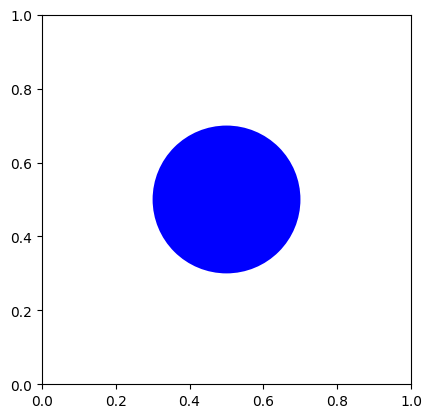

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# 创建一个图形和坐标轴
fig, ax = plt.subplots()

# 创建一个圆，圆心在 (0.5, 0.5)，半径为 0.2
circle = Circle((0.5, 0.5), 0.2, facecolor='blue')

# 将圆添加到坐标轴
ax.add_patch(circle)

# 设置坐标轴的范围和纵横比
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

# 显示图形
plt.show()

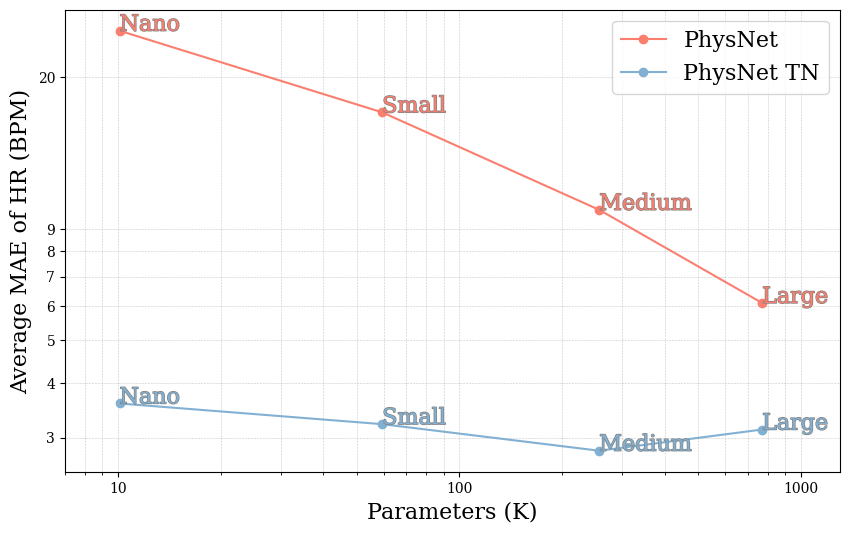

In [178]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from matplotlib.ticker import ScalarFormatter
import matplotlib.patheffects as path_effects

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# 数据
models = ['PhysNet', 'PhysNet TN']
params = np.array([10121, 59441, 256721, 769825])/1000
mae_model_a = [25.5, 16.6, 9.94, 6.09]
mae_model_b = [3.59, 3.22, 2.80, 3.13]


# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(params, mae_model_a, marker='o', label='PhysNet', color='#FA7F6F')
plt.plot(params, mae_model_b, marker='o', label='PhysNet TN', color='#82B0D2')

# 标注数据点
for i, (param, name) in enumerate(zip(params, ['Nano','Small','Medium','Large'])):
    plt.text(param, mae_model_a[i], f'{name}', fontsize=16, color='#FA7F6F').set_path_effects([path_effects.Stroke(linewidth=1, foreground='gray'), path_effects.Normal()])
    plt.text(param, mae_model_b[i], f'{name}', fontsize=16, color='#82B0D2').set_path_effects([path_effects.Stroke(linewidth=1, foreground='gray'), path_effects.Normal()])

plt.xscale('log')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
#plt.gca().xaxis.set_major_locator(LogLocator(base=10, subs='all'))
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, subs='auto', numticks=10))
plt.grid(True, which='both', linestyle='--', linewidth=0.4, alpha=0.7)

plt.xlim((7, 1.3e3))

# 添加标题和标签
#plt.title('Parameter Count vs Mean Absolute Error (MAE)')
plt.xlabel('Parameters (K)', fontsize=16)
plt.ylabel('Average MAE of HR (BPM)', fontsize=16)
plt.legend(fontsize=16)

# 显示图表
plt.savefig('plot.png', dpi=300)
plt.show()


In [177]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TNM(nn.Module):
    def __init__(self, enabled=True, frames=0, axis=2, eps=1e-6):
        super(TNM, self).__init__()
        self.enabled = enabled
        self.frames = frames
        self.axis = axis
        self.eps = eps

    def forward(self, x):
        if self.enabled:
            dtype = x.dtype
            x_ = x.to(torch.float32)
            x_ = x_.reshape((*x.shape[:self.axis], -1, self.frames, *x.shape[self.axis+1:]))
            
            mean = x_.mean(dim=self.axis + 1, keepdim=True)
            tshape = [1] * len(x_.shape)
            tshape[self.axis + 1] = self.frames
            t = torch.linspace(0, 1, self.frames).reshape(tshape).to(x.device)
            
            n = ((t - 0.5) * (x_ - mean)).sum(dim=self.axis + 1, keepdim=True)
            d = ((t - 0.5) ** 2).sum(dim=self.axis + 1, keepdim=True)
            i = mean - n / d * 0.5
            trend = n / d * t + i
            x_ = x_ - trend
            
            std = ((x_ ** 2).mean(dim=self.axis + 1, keepdim=True) + self.eps).sqrt()
            x_ = x_ / std
            
            x_ = x_.reshape(x.shape)
            return x_.to(dtype)
        else:
            return x

# 示例使用
input_tensor = torch.randn(4, 3, 10, 32, 32).cuda()  # 假设输入是一个10帧的视频，每帧大小为32x32
tnm_layer = TNM(enabled=True, frames=10, axis=2)
output_tensor = tnm_layer(input_tensor)
print(output_tensor.shape)


torch.Size([4, 3, 10, 32, 32])
